# Introduction:
A typical 4G network consists of several nodes connected to each other, where each node serves
users in the surrounding area. While users are accessing network services, their mobile phones
record Key Performance Indicators (KPI’s) which can help network operators in assessing their
quality of service.

There are many KPI’s which evaluate different aspects of the network. For example, RSRP
(Reference Signals Received Power) is a KPI which measures the network coverage in the user’s
location. Traffic Volume is another KPI which measures how much data has been consumed by the
user.

<span style="color:red">***This notebook should be run inside jupyter lab***</span>

# Importing tools:

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
# The wordclouds lib
from wordcloud import WordCloud

# the interactive plotting libs
import holoviews as hv
from holoviews.operation.datashader import  inspect, rasterize
# colour maps lib
import colorcet as cc
# to convet the lat and lon to mercato web format
from datashader.utils import lnglat_to_meters
# panel lib for widgets and dashboards
import panel as pn
pn.extension()
hv.extension('bokeh')

# Reading Data:

In [2]:
RSRP_data = pd.read_csv("RSRP.csv")

# EDA & Data Cleaning:

In [3]:
RSRP_data.head(10)

Timestamp  LocationLatitude  LocationLongitude  \
0  2019-11-02 00:09:29.386 +0300          24.54054          46.784737   
1  2019-11-02 00:09:29.386 +0300          24.54054          46.784737   
2  2019-11-02 00:10:45.323 +0300          24.54054          46.784737   
3  2019-11-02 00:10:45.323 +0300          24.54054          46.784737   
4  2019-11-02 00:11:26.822 +0300          24.54054          46.784737   
5  2019-11-02 00:11:26.822 +0300          24.54054          46.784737   
6  2019-11-02 00:17:44.340 +0300          24.54054          46.784737   
7  2019-11-02 00:17:44.340 +0300          24.54054          46.784737   
8  2019-11-02 00:23:41.693 +0300          24.54054          46.784737   
9  2019-11-02 00:23:41.693 +0300          24.54054          46.784737   

  RadioConnectionType       Country RadioNetworkGeneration RadioOperatorName  \
0              Mobile  Saudi Arabia                     4G        Operator C   
1              Mobile  Saudi Arabia                     4G        Operator C   
2              Mobile  Saudi Arabia                     3G        Operator C   
3              Mobile  Saudi Arabia                     3G        Operator C   
4              Mobile  Saudi Arabia                     4G        Operator C   
5              Mobile  Saudi Arabia                     4G        Operator C   
6              Mobile  Saudi Arabia                     3G        Operator C   
7              Mobile  Saudi Arabia                     3G        Operator C   
8              Mobile  Saudi Arabia                     2G        Operator C   
9              Mobile  Saudi Arabia                     2G        Operator C   

         RSRP RadioMobileDataEnabled DeviceManufacturer           DeviceName  
0  2147483647                Enabled                HTC                D728W  
1  2147483647                Enabled                HTC  Desire 728 Dual Sim  
2  2147483647                Enabled                HTC                D728W  
3  2147483647                Enabled                HTC  Desire 728 Dual Sim  
4  2147483647                Enabled                HTC                D728W  
5  2147483647                Enabled                HTC  Desire 728 Dual Sim  
6  2147483647                Enabled                HTC                D728W  
7  2147483647                Enabled                HTC  Desire 728 Dual Sim  
8  2147483647                Enabled                HTC                D728W  
9  2147483647                Enabled                HTC  Desire 728 Dual Sim

In [4]:
RSRP_data.sample(20)

Timestamp  LocationLatitude  LocationLongitude  \
2105500  2019-11-04 20:32:52.694 +0300         24.597570          46.783360   
243742   2019-11-02 17:22:16.036 +0300         24.592514          46.715607   
1355261  2019-11-02 10:20:41.063 +0300         24.785698          46.705536   
656243   2019-11-02 19:30:59.016 +0300         24.722376          46.823254   
265781   2019-11-02 05:17:15.001 +0300         24.832410          46.759680   
1397609  2019-11-03 16:52:27.033 +0300         24.750065          46.852650   
736988   2019-11-03 07:56:09.000 +0300         24.741863          46.697754   
2246260  2019-11-03 08:36:42.487 +0300         24.759703          46.673890   
121046   2019-11-02 06:05:33.057 +0300         24.596746          46.680603   
1238952  2019-11-03 20:26:51.999 +0300         24.626148          46.706684   
2273952  2019-11-04 17:54:43.000 +0300         24.765142          46.784683   
1629010  2019-11-03 21:55:06.019 +0300         24.807367          46.769840   
1241423  2019-11-03 08:29:36.001 +0300         24.625072          46.688137   
1300000  2019-11-02 23:52:49.000 +0300         24.833664          46.791245   
1036430  2019-11-02 22:53:13.000 +0300         24.695420          46.654583   
1945146  2019-11-04 08:45:17.000 +0300         24.789766          46.715134   
491112   2019-11-03 08:05:06.026 +0300         24.650927          46.697380   
2543259  2019-11-04 20:52:48.000 +0300         24.716166          46.764977   
262504   2019-11-02 12:38:57.017 +0300         24.590422          46.679110   
355036   2019-11-03 00:00:52.027 +0300         24.888435          46.454940   

        RadioConnectionType       Country RadioNetworkGeneration  \
2105500              Mobile  Saudi Arabia                     4G   
243742               Mobile  Saudi Arabia                     4G   
1355261              Mobile  Saudi Arabia                     4G   
656243               Mobile  Saudi Arabia                     3G   
265781               Mobile  Saudi Arabia                     4G   
1397609              Mobile  Saudi Arabia                     4G   
736988               Mobile  Saudi Arabia                     4G   
2246260              Mobile  Saudi Arabia                     4G   
121046               Mobile  Saudi Arabia                     4G   
1238952              Mobile  Saudi Arabia                     4G   
2273952              Mobile  Saudi Arabia                     4G   
1629010              Mobile  Saudi Arabia                     3G   
1241423              Mobile  Saudi Arabia                     4G   
1300000              Mobile  Saudi Arabia                     4G   
1036430              Mobile  Saudi Arabia                     3G   
1945146              Mobile  Saudi Arabia                     4G   
491112               Mobile  Saudi Arabia                     4G   
2543259              Mobile  Saudi Arabia                     4G   
262504               Mobile  Saudi Arabia                     4G   
355036               Mobile  Saudi Arabia                     3G   

        RadioOperatorName        RSRP RadioMobileDataEnabled  \
2105500        Operator B         -85                Enabled   
243742         Operator A         -82                Enabled   
1355261        Operator A         -77                Enabled   
656243         Operator B  2147483647                Enabled   
265781         Operator C         -72                Enabled   
1397609        Operator A         -90                Enabled   
736988         Operator A         -91                Enabled   
2246260        Operator B         -79                Enabled   
121046         Operator A         -83                Enabled   
1238952        Operator A         -99                Enabled   
2273952        Operator C         -90                Enabled   
1629010        Operator B  2147483647                Enabled   
1241423        Operator A         -82                Enabled   
1300000        Operator C         -88       

In [ ]:
RSRP_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2725353 entries, 0 to 2725352
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Timestamp               object 
 1   LocationLatitude        float64
 2   LocationLongitude       float64
 3   RadioConnectionType     object 
 4   Country                 object 
 5   RadioNetworkGeneration  object 
 6   RadioOperatorName       object 
 7   RSRP                    int64  
 8   RadioMobileDataEnabled  object 
 9   DeviceManufacturer      object 
 10  DeviceName              object 
dtypes: float64(2), int64(1), object(8)
memory usage: 228.7+ MB


There is categorical data but it's treated as it is a string, I'll convert it into the category data type

In [41]:
cols = [
       "RadioConnectionType",
       "RadioNetworkGeneration",
       "RadioOperatorName",
       "RadioMobileDataEnabled",
       "DeviceManufacturer",
       "DeviceName"
      ]
RSRP_data[cols] = RSRP_data[cols].astype('category')

In [42]:
RSRP_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2723541 entries, 0 to 2725352
Data columns (total 10 columns):
 #   Column                  Dtype              
---  ------                  -----              
 0   Timestamp               datetime64[ns, UTC]
 1   LocationLatitude        float64            
 2   LocationLongitude       float64            
 3   RadioConnectionType     category           
 4   RadioNetworkGeneration  category           
 5   RadioOperatorName       category           
 6   RSRP                    int64              
 7   RadioMobileDataEnabled  category           
 8   DeviceManufacturer      category           
 9   DeviceName              category           
dtypes: category(6), datetime64[ns, UTC](1), float64(2), int64(1)
memory usage: 122.1 MB


In [6]:
# let's look at the 'Country' column, seems all the values are Saudi Arabia
RSRP_data["Country"].value_counts()

Saudi Arabia    2725197
Name: Country, dtype: int64

**Since There's only one value in this column, it should be removed since it does not contain much information.**

In [7]:
#There only one value in the Country column, it's better to remove that column to simplify our data
RSRP_data.drop("Country", axis=1, inplace=True)

In [8]:
# let's look at the 'RadioConnectionType' column, seems all the values are Mobile
RSRP_data["RadioConnectionType"].value_counts()

Mobile     2717295
WiFi          7390
Unknown        668
Name: RadioConnectionType, dtype: int64

**Note:**
We have way more mobile instances than the other but still we can't delete the column like we did before.

In [9]:
RSRP_data["RadioMobileDataEnabled"].value_counts()

Enabled     2724635
Disabled        718
Name: RadioMobileDataEnabled, dtype: int64

**Again**, there is a class that is dominating and a few instances of the other.
We can't drop this column too, but data must be prepared if a classification will be used becuase of how skwed our dataset is towards a specific class. 

In [10]:
# let's take a look at the RadioNetworkGeneration
RSRP_data["RadioNetworkGeneration"].value_counts()

4G         2257240
3G          445246
Unknown      17361
2G            5464
WiFi            42
Name: RadioNetworkGeneration, dtype: int64

**4G domination!**

In [11]:
# let's take a look at the manufacturer
RSRP_data["DeviceManufacturer"].value_counts()

samsung       2404478
HUAWEI         111972
HTC             36046
LGE             30428
Xiaomi          25612
HMD Global      23497
motorola        19909
LENOVO          18679
TCL              9607
OnePlus          9559
OPPO             9108
vivo             6502
Lenovo           5862
Sony             4040
lenovo           3517
Realme           1760
realme           1598
PANASONIC        1224
QMobile           723
htc               578
LeEco             293
E1                135
ZTE               133
Hisense            40
OBI                18
SHARP              12
Mione               9
Infinix             8
LAVA                6
Name: DeviceManufacturer, dtype: int64

**There are things to notice here:**
- Samsung domination!
- Some manufacturer have different names for example: there's ( **Realme**, **realme** | **Lenovo**, **lenovo**, **LENOVO** | **HTC**, **htc** ). If we wish we can even join Realme, vivo, Oppo into one category since these belong to a single company.
- Another thing to notice here is the LGE manufacturer, this refers to the LG company. 


*Let's rename this to the most common name and name the duplicates with one exact name.*

In [12]:
RSRP_data["DeviceManufacturer"].replace("Realme", "realme", inplace=True)
RSRP_data["DeviceManufacturer"].replace("lenovo", "Lenovo", inplace=True)
RSRP_data["DeviceManufacturer"].replace("LENOVO", "Lenovo", inplace=True)
RSRP_data["DeviceManufacturer"].replace("htc", "HTC", inplace=True)
RSRP_data["DeviceManufacturer"].replace("LGE", "LG", inplace=True)
RSRP_data["DeviceManufacturer"].replace("samsung", "SAMSUNG", inplace=True)

In [13]:
RSRP_data["DeviceManufacturer"].value_counts()

SAMSUNG       2404478
HUAWEI         111972
HTC             36624
LG              30428
Lenovo          28058
Xiaomi          25612
HMD Global      23497
motorola        19909
TCL              9607
OnePlus          9559
OPPO             9108
vivo             6502
Sony             4040
realme           3358
PANASONIC        1224
QMobile           723
LeEco             293
E1                135
ZTE               133
Hisense            40
OBI                18
SHARP              12
Mione               9
Infinix             8
LAVA                6
Name: DeviceManufacturer, dtype: int64

**Now Lenovo is looking big!**

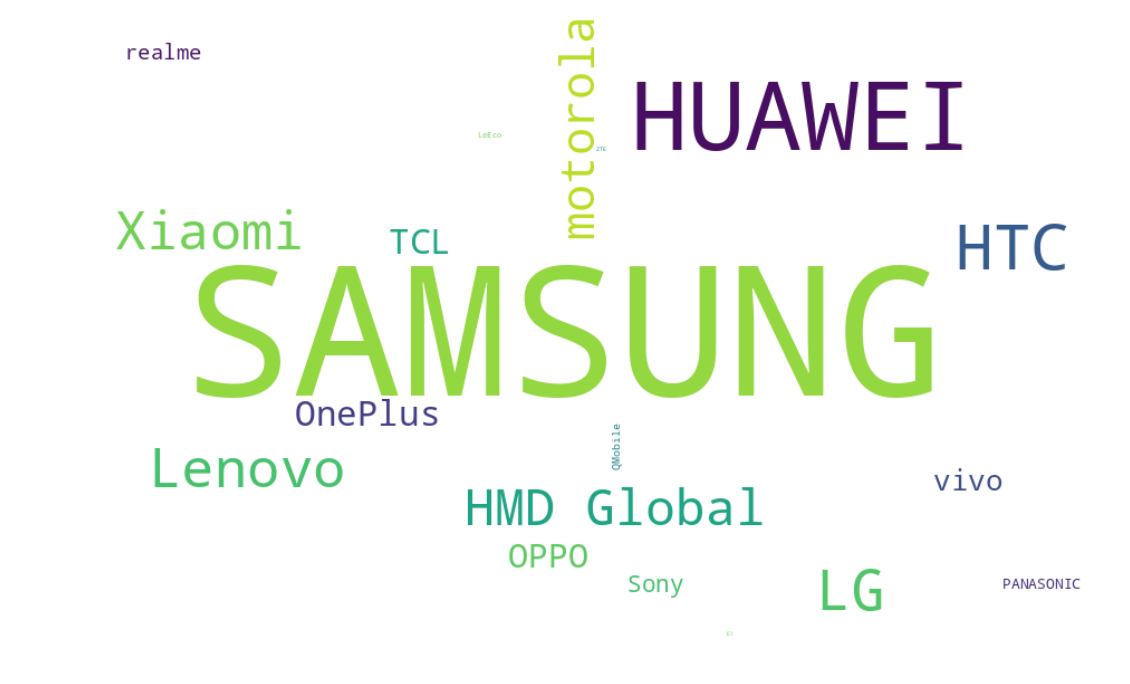

In [14]:
# Another way of plotting these values is by creating a wordcloud
manufacturer_word_cloud = WordCloud(background_color="white", width=1000, height=600)
img = manufacturer_word_cloud.generate_from_frequencies(RSRP_data["DeviceManufacturer"].value_counts())

plt.figure(figsize=(20,15))
plt.imshow(img, interpolation="bilinear")
plt.axis("off")
plt.show()

This visual shows how each class weight in a simple visualization.

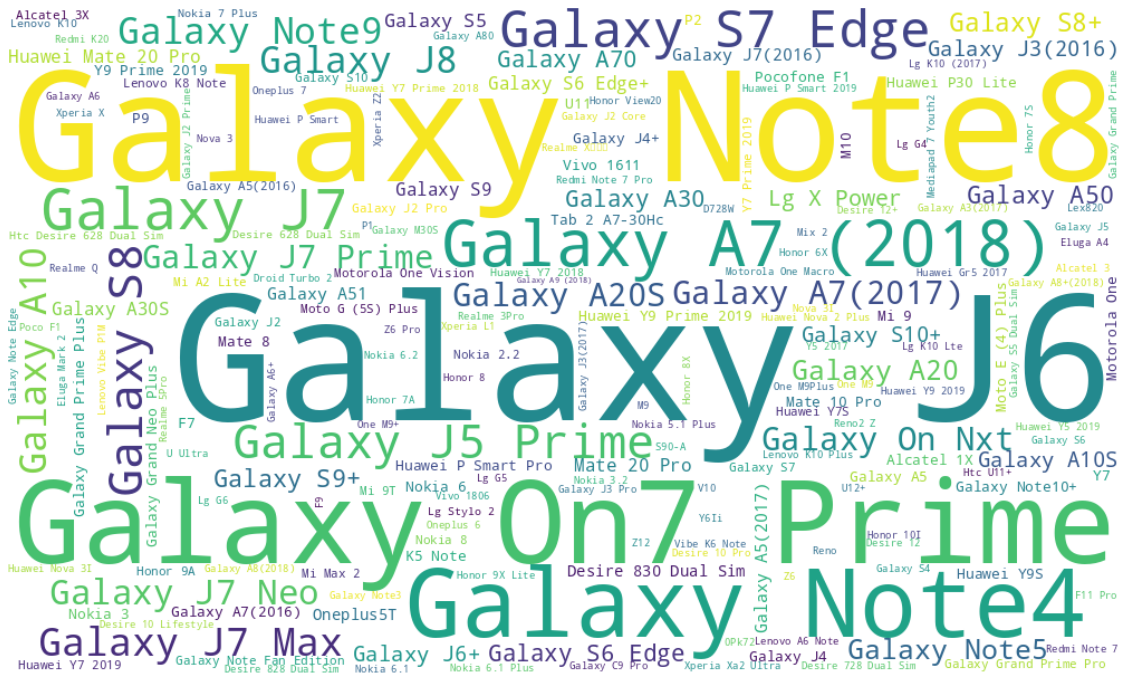

In [15]:
# Another way of plotting these values by creating a wordcloud
manufacturer_word_cloud = WordCloud(background_color="white", width=1000, height=600)
img = manufacturer_word_cloud.generate_from_frequencies(RSRP_data["DeviceName"].value_counts())

plt.figure(figsize=(20,15))
plt.imshow(img, interpolation="bilinear")
plt.axis("off")
plt.show()

**Now**, the *'Timestamp'* column must be converted to the datetime datatype in pandas. The *'to_datetime'* method is used with the format parameter provided, this helps in making the conversion process quick and more accurate. The formate of the datatime can be deduced from the dataset. Pandas provides a nice way to represent the time in way similar to regex.

In [16]:
# Now let's convert the TimeStamp column to datetime type in pandas, the 'utc' parameter is essential here for this to work!
RSRP_data["Timestamp"] = pd.to_datetime(RSRP_data["Timestamp"], format="%Y-%m-%d %H:%M:%S.%f%z", utc=True)

In [17]:
RSRP_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2725353 entries, 0 to 2725352
Data columns (total 10 columns):
 #   Column                  Dtype              
---  ------                  -----              
 0   Timestamp               datetime64[ns, UTC]
 1   LocationLatitude        float64            
 2   LocationLongitude       float64            
 3   RadioConnectionType     object             
 4   RadioNetworkGeneration  object             
 5   RadioOperatorName       object             
 6   RSRP                    int64              
 7   RadioMobileDataEnabled  object             
 8   DeviceManufacturer      object             
 9   DeviceName              object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(6)
memory usage: 207.9+ MB


Looking at the Timestamp column, the dtype of Timestamp is now a datetime type

Now let's check our numerical fields to check that they are in the valid range

The valid range for latitude is between +90 and -90, any values outside this range are invalid

In [18]:
RSRP_data[(RSRP_data['LocationLatitude'] > 90) | (RSRP_data['LocationLatitude'] < -90)].value_counts().sum()

0

**All latitude values are valid!**

The valid range for longitude is between +180 and -180, any values outside this range are invalid

In [19]:
RSRP_data[(RSRP_data['LocationLongitude'] > 180) | (RSRP_data['LocationLongitude'] < -180)].value_counts().sum()

0

**All longtitude values are valid!**

There something weird with the RSRP column here, there's a very big positive value and the rest are small negative ones.

The valid range for RSRP is [-44,-140]
Let's look up the invalid values.

In [20]:
RSRP_data_invalid = RSRP_data[(RSRP_data['RSRP'] > -44) | (RSRP_data['RSRP'] < -140)]
RSRP_data_invalid[RSRP_data_invalid["RSRP"] == 2147483647]

Timestamp  LocationLatitude  LocationLongitude  \
0       2019-11-01 21:09:29.386000+00:00         24.540540          46.784737   
1       2019-11-01 21:09:29.386000+00:00         24.540540          46.784737   
2       2019-11-01 21:10:45.323000+00:00         24.540540          46.784737   
3       2019-11-01 21:10:45.323000+00:00         24.540540          46.784737   
4       2019-11-01 21:11:26.822000+00:00         24.540540          46.784737   
...                                  ...               ...                ...   
2724318        2019-11-02 15:59:42+00:00         24.723953          46.669780   
2725269 2019-11-03 08:35:23.171000+00:00         24.812200          46.752940   
2725270 2019-11-03 08:35:32.550000+00:00         24.812200          46.752940   
2725316 2019-11-03 13:50:06.017000+00:00         24.812235          46.752796   
2725325 2019-11-03 14:25:19.527000+00:00         24.812230          46.752800   

        RadioConnectionType RadioNetworkGeneration RadioOperatorName  \
0                    Mobile                     4G        Operator C   
1                    Mobile                     4G        Operator C   
2                    Mobile                     3G        Operator C   
3                    Mobile                     3G        Operator C   
4                    Mobile                     4G        Operator C   
...                     ...                    ...               ...   
2724318              Mobile                     4G        Operator C   
2725269              Mobile                     3G        Operator A   
2725270              Mobile                     4G        Operator A   
2725316              Mobile                     3G        Operator A   
2725325              Mobile                     3G        Operator A   

               RSRP RadioMobileDataEnabled DeviceManufacturer  \
0        2147483647                Enabled                HTC   
1        2147483647                Enabled                HTC   
2        2147483647                Enabled                HTC   
3        2147483647                Enabled                HTC   
4        2147483647                Enabled                HTC   
...             ...                    ...                ...   
2724318  2147483647                Enabled            SAMSUNG   
2725269  2147483647                Enabled            SAMSUNG   
2725270  2147483647                Enabled            SAMSUNG   
2725316  2147483647                Enabled            SAMSUNG   
2725325  2147483647                Enabled            SAMSUNG   

                  DeviceName  
0                      D728W  
1        Desire 728 Dual Sim  
2                      D728W  
3        Desire 728 Dual Sim  
4                      D728W  
...                      ...  
2724318        Galaxy On Nxt  
2725269          Galaxy A20S  
2725270          Galaxy A20S  
2725316          Galaxy A20S  
2725325          Galaxy A20S  

[643705 rows x 10 columns]

***A huge number of invalid data points for RSRP values, however it's better not to drop these datapoints now, these rows still contain useful information that we can use.***

This data contains longtitude and latitude, we were informed that this data is from Saudi Arabia, but we don't know which part of Saudi Arabia. These points can be plotted and using a refrence point (drawn using a red traingle) and google maps or openstreetmaps, we can find the area from which this data came.

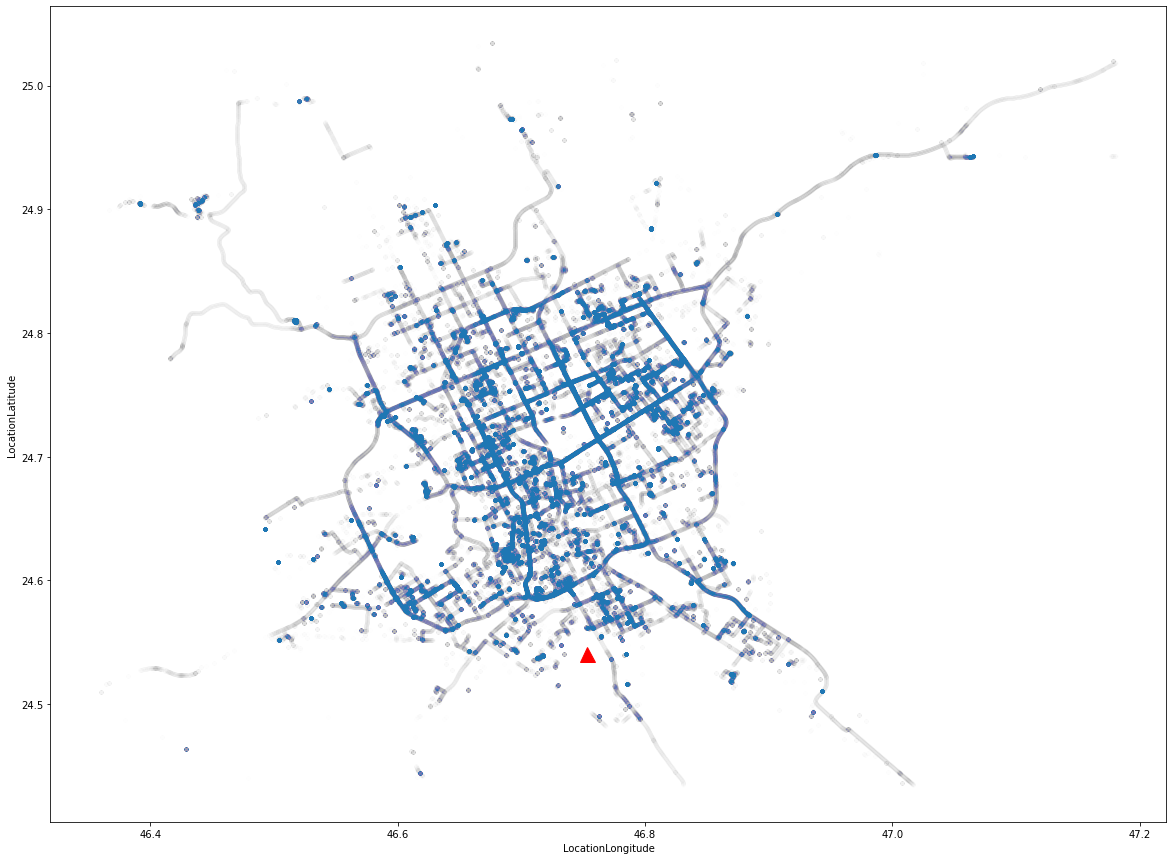

In [21]:
RSRP_data_invalid.plot(kind="scatter", 
                        x="LocationLongitude", 
                        y="LocationLatitude",
                        alpha=0.005,
                        figsize=(20,15))

plt.plot(46.752800, 24.540540, '^r', markersize=15)
plt.show()

***By looking at the google maps and using the red point as a refrence point we can see that this is map of Riyad city.***
<img src="riyad.png"/>

*Now let's look at our valid data:*

In [22]:
RSRP_data_valid = RSRP_data[(RSRP_data['RSRP'] < -44) & (RSRP_data['RSRP'] > -140)]
RSRP_data_valid.sample(40)

Timestamp  LocationLatitude  LocationLongitude  \
609708  2019-11-03 04:16:35.021000+00:00         24.586449          46.581875   
2566068 2019-11-03 19:08:10.423000+00:00         24.922411          46.566147   
1815272        2019-11-04 04:11:12+00:00         24.832424          46.759470   
2569641 2019-11-04 19:58:20.040000+00:00         24.664140          46.777530   
1613443 2019-11-04 05:03:41.029000+00:00         24.624650          46.716540   
2665759 2019-11-04 16:37:21.020000+00:00         24.513636          46.678850   
2175251 2019-11-03 10:20:44.001000+00:00         24.855312          46.716396   
382326  2019-11-01 23:23:18.731000+00:00         24.630661          46.551533   
1164847        2019-11-02 14:35:50+00:00         24.666908          46.725365   
2650781 2019-11-04 06:46:51.016000+00:00         24.795574          46.728916   
824683         2019-11-03 20:24:25+00:00         24.724897          46.603260   
581328  2019-11-02 08:55:11.038000+00:00         24.799050          46.816456   
306090  2019-11-01 23:44:57.031000+00:00         24.644413          46.591934   
242993  2019-11-02 13:35:48.021000+00:00         24.555690          46.657032   
2118527 2019-11-04 11:54:08.001000+00:00         24.653133          46.701557   
1159435 2019-11-02 16:28:13.490000+00:00         24.596827          46.673270   
1355514 2019-11-02 07:38:28.020000+00:00         24.705679          46.675137   
882445         2019-11-02 16:08:35+00:00         24.672972          46.665524   
1482021        2019-11-04 17:12:43+00:00         24.693855          46.724228   
2373222        2019-11-04 17:48:43+00:00         24.807293          46.688686   
426547         2019-11-02 08:21:27+00:00         24.614397          46.819973   
250045  2019-11-02 05:56:44.016000+00:00         24.542065          46.658764   
619480  2019-11-02 17:43:32.041000+00:00         24.756811          46.673840   
2143676 2019-11-04 02:57:02.001000+00:00         24.832544          46.759800   
265491         2019-11-02 02:02:41+00:00         24.832369          46.759575   
1230884 2019-11-02 15:30:32.046000+00:00         24.754251          46.630314   
1488264        2019-11-04 06:44:16+00:00         24.530607          46.940582   
572056  2019-11-02 15:46:52.022000+00:00         24.805820          46.756447   
480655  2019-11-02 22:27:57.504000+00:00         24.567596          46.846024   
2341114        2019-11-04 05:03:00+00:00         24.797173          46.732174   
198056  2019-11-02 07:20:03.999000+00:00         24.765278          46.735990   
2617586 2019-11-04 06:29:19.046000+00:00         24.676916          46.693542   
376617  2019-11-02 15:51:18.011000+00:00         24.537666          46.725870   
812296         2019-11-03 09:45:30+00:00         24.695790          46.680330   
1897309        2019-11-03 13:12:57+00:00         24.779217          46.798960   
1893906 2019-11-04 04:53:22.052000+00:00         24.596594          46.680660   
765350  2019-11-02 17:49:21.027000+00:00         24.758688          46.662857   
1800056 2019-11-04 06:53:13.224000+00:00         24.903538          46.630070   
2595561 2019-11-04 11:10:52.047000+00:00         24.727942          46.833923   
2629182 2019-11-04 14:33:11.145000+00:00         24.562029          46.632675   

        RadioConnectionType RadioNetworkGeneration RadioOperatorName  RSRP  \
609708               Mobile                     4G        Operator A   -78   
2566068              Mobile                     4G        Operator C  -100   
1815272              Mobile                     4G        Operator C   -67   
2569641              Mobile                     4G        Operator A   -74   
1613443              Mobile                     4G        Operator B   -72   
2665759              Mobile                     4G        Operator A  -107   
2175251              Mobile                     4G        Operator C   -78   
382326               Mobile                     4G        Operator A  -112   
1164847

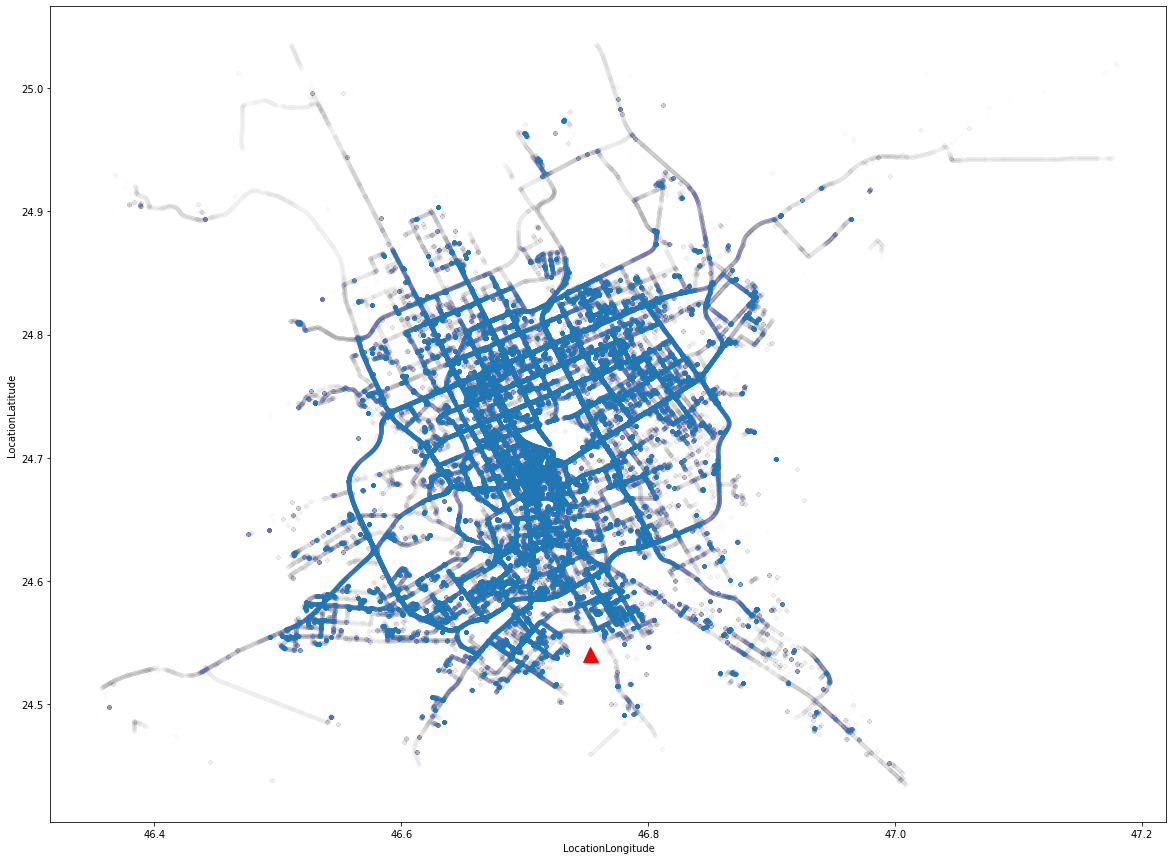

In [23]:
RSRP_data_valid.plot(kind="scatter", 
                        x="LocationLongitude", 
                        y="LocationLatitude",
                        alpha=0.005,
                        figsize=(20,15))

plt.plot(46.752800, 24.540540, '^r', markersize=15)
plt.show()

***Another map of Riyad.***

We can see that the devices with the invalid RSRP value are distributed as much as the ones with a valid RSRP value, i.e there's no areas which appear on a map but not the other. We can't link these invalid values to a certain area or location, furthur investegation is needed.

In [24]:
RSRP_data_invalid.sample(20)

Timestamp  LocationLatitude  LocationLongitude  \
1760650        2019-11-03 14:37:21+00:00         24.712717          46.675785   
2051833 2019-11-04 04:15:47.001000+00:00         24.607607          46.685005   
2500432 2019-11-04 06:37:03.032000+00:00         24.824196          46.749565   
387370  2019-11-02 07:48:33.087000+00:00         24.666672          46.725250   
1765244        2019-11-03 20:19:27+00:00         24.586044          46.708560   
2185849 2019-11-04 13:06:20.026000+00:00         24.767414          46.644150   
2363422 2019-11-04 14:38:31.020000+00:00         24.658320          46.764797   
2463121 2019-11-04 15:04:01.024000+00:00         24.807384          46.770030   
584752  2019-11-02 14:13:42.028000+00:00         24.806780          46.769900   
1008347        2019-11-03 12:24:05+00:00         24.778166          46.803185   
345466  2019-11-02 16:57:48.022000+00:00         24.730257          46.807380   
1404831 2019-11-04 15:13:22.042000+00:00         24.512135          46.634388   
440357  2019-11-02 05:08:11.024000+00:00         24.815422          46.766470   
439612  2019-11-02 04:20:19.028000+00:00         24.820140          46.783165   
1224227 2019-11-02 21:46:55.029000+00:00         24.817684          46.782215   
2321277 2019-11-04 04:49:04.986000+00:00         24.818422          46.845966   
912801  2019-11-02 14:40:12.036000+00:00         24.807250          46.769890   
1315385 2019-11-02 10:04:56.999000+00:00         24.587597          46.770885   
2463374 2019-11-04 15:44:03.030000+00:00         24.807325          46.769855   
2610844 2019-11-04 13:51:23.033000+00:00         24.777243          46.823370   

        RadioConnectionType RadioNetworkGeneration RadioOperatorName  \
1760650              Mobile                     3G        Operator A   
2051833              Mobile                     3G        Operator A   
2500432              Mobile                     3G        Operator B   
387370               Mobile                     4G        Operator A   
1765244              Mobile                     3G        Operator A   
2185849              Mobile                     4G        Operator A   
2363422              Mobile                     4G        Operator B   
2463121              Mobile                     3G        Operator B   
584752               Mobile                     3G        Operator B   
1008347              Mobile                     3G        Operator B   
345466               Mobile                     4G        Operator C   
1404831              Mobile                     4G        Operator A   
440357               Mobile                     3G        Operator B   
439612               Mobile                     3G        Operator B   
1224227              Mobile                     4G        Operator C   
2321277              Mobile                     3G        Operator A   
912801               Mobile                     3G        Operator B   
1315385              Mobile                     3G        Operator A   
2463374              Mobile                     3G        Operator B   
2610844              Mobile                     3G        Operator B   

               RSRP RadioMobileDataEnabled DeviceManufacturer  \
1760650  2147483647                Enabled            SAMSUNG   
2051833  2147483647                Enabled            SAMSUNG   
2500432  2147483647                Enabled            SAMSUNG   
387370   2147483647                Enabled            SAMSUNG   
1765244  2147483647                Enabled            SAMSUNG   
2185849  2147483647                Enabled            SAMSUNG   
2363422  2147483647                Enabled            SAMSUNG   
2463121  2147483647                Enabled            SAMSUNG   
584752   2147483647                Enabled            SAMSUNG   
1008347  2147483647                Enabled            SAMSUNG   
345466   2147483647                Enabled            SAMSUNG   
1404831  2147483647                E

In [25]:
RSRP_data_invalid["DeviceManufacturer"].value_counts()

SAMSUNG       598200
Lenovo         12956
HUAWEI         10099
motorola        4743
HTC             3876
LG              3025
OnePlus         2547
HMD Global      2442
Sony            1934
Xiaomi          1199
OPPO             855
vivo             546
QMobile          535
PANASONIC        496
TCL              324
realme           168
E1               135
Hisense           40
OBI                9
Mione              9
Infinix            8
ZTE                6
LAVA               6
SHARP              5
Name: DeviceManufacturer, dtype: int64

By looking at these numbers and the number for the whole dataset, the issue seems to be happening across all types of devices and not specific to a type. The order of the devices manufacturer is almost the same.

In [26]:
RSRP_data_invalid['RSRP'].value_counts()

 2147483647    643705
 0                455
-1                  2
 12                 1
Name: RSRP, dtype: int64

In [27]:
RSRP_data_invalid[RSRP_data_invalid["RSRP"] == 0].sample(20)

Timestamp  LocationLatitude  LocationLongitude  \
141765  2019-11-02 11:23:22.032000+00:00         24.831928          46.608980   
142054  2019-11-02 14:31:20.032000+00:00         24.630281          46.717773   
299950  2019-11-02 11:32:06.043000+00:00         24.827572          46.566418   
157172  2019-11-02 14:30:29.025000+00:00         24.630724          46.718758   
2713800 2019-11-03 13:59:16.026000+00:00         24.666607          46.730923   
2716124 2019-11-03 13:58:26.024000+00:00         24.669899          46.728600   
300060  2019-11-02 14:30:52.025000+00:00         24.630676          46.718544   
10047   2019-11-02 11:35:40.053000+00:00         24.826994          46.565285   
141905  2019-11-02 11:29:49.035000+00:00         24.831810          46.578796   
2711750 2019-11-03 13:59:48.027000+00:00         24.664303          46.732872   
299830  2019-11-02 11:28:50.025000+00:00         24.835417          46.587760   
299704  2019-11-02 11:25:37.037000+00:00         24.822138          46.603065   
142053  2019-11-02 14:31:19.026000+00:00         24.630291          46.717796   
141815  2019-11-02 11:25:36.097000+00:00         24.822205          46.603230   
141851  2019-11-02 11:27:04.028000+00:00         24.823647          46.593987   
157106  2019-11-02 11:22:50.036000+00:00         24.831718          46.609047   
9877    2019-11-02 11:25:46.010000+00:00         24.821524          46.601640   
9933    2019-11-02 11:29:45.087000+00:00         24.832003          46.579365   
300042  2019-11-02 14:30:25.022000+00:00         24.630775          46.718870   
141868  2019-11-02 11:27:55.026000+00:00         24.828440          46.591515   

        RadioConnectionType RadioNetworkGeneration RadioOperatorName  RSRP  \
141765               Mobile                     4G        Operator A     0   
142054               Mobile                     4G        Operator A     0   
299950               Mobile                     4G        Operator A     0   
157172               Mobile                     4G        Operator A     0   
2713800              Mobile                     4G        Operator A     0   
2716124              Mobile                     4G        Operator A     0   
300060               Mobile                     4G        Operator A     0   
10047                Mobile                     4G        Operator A     0   
141905               Mobile                     4G        Operator A     0   
2711750              Mobile                     4G        Operator A     0   
299830               Mobile                     4G        Operator A     0   
299704               Mobile                     4G        Operator A     0   
142053               Mobile                     4G        Operator A     0   
141815               Mobile                     4G        Operator A     0   
141851               Mobile                     4G        Operator A     0   
157106               Mobile                     4G        Operator A     0   
9877                 Mobile                     4G        Operator A     0   
9933                 Mobile                     4G        Operator A     0   
300042               Mobile                     4G        Operator A     0   
141868               Mobile                     4G        Operator A     0   

        RadioMobileDataEnabled DeviceManufacturer DeviceName  
141765                 Enabled             HUAWEI       Y6Ii  
142054                 Enabled             HUAWEI       Y6Ii  
299950                 Enabled             HUAWEI       Y6Ii  
157172                 Enabled             HUAWEI       Y6Ii  
2713800                Enabled             HUAWEI       Y6Ii  
2716124                Enabled             HUAWEI       Y6Ii  
300060                 Enabled             HUAWEI       Y6Ii  
10047                  Enabled             HUAWEI       Y6Ii  
141905                 Enabled             HUAWEI       Y6Ii  
2711750                Enabled             HUAWEI       Y6Ii

Reporting a 0 for the RSRP value seems to be an issue for HUAWEI Y6li model. By searching online, the large positive value, 2147483647, is the largest number an integer can hold (according to android documentation), and it's reported by android devices when the RSRP value isn't avaliable on the device (due to congestion and other factors). But a 0 value is unexpected.

In [28]:
RSRP_data[RSRP_data["DeviceName"] == "Y6Ii"]["DeviceName"].value_counts()

Y6Ii    1009
Name: DeviceName, dtype: int64

In [29]:
RSRP_data_invalid[RSRP_data_invalid["DeviceName"] == "Y6Ii"]["DeviceName"].value_counts()

Y6Ii    429
Name: DeviceName, dtype: int64

In [30]:
RSRP_data_invalid[RSRP_data_invalid["RSRP"] == 0]["DeviceManufacturer"].value_counts()

HUAWEI    455
Name: DeviceManufacturer, dtype: int64

We can see that this an issue onlt happening with HUAWEI devices and especially the model Y6li

In [31]:
RSRP_data_invalid["DeviceName"].value_counts()

Galaxy A7 (2018)    103799
Galaxy J6            69785
Galaxy On7 Prime     47702
Galaxy Note4         45088
Galaxy S7 Edge       31853
                     ...  
P20Pro                   1
P20 Pro                  1
Z6 Pro                   1
Z6                       1
Redmi Note 8 Pro         1
Name: DeviceName, Length: 255, dtype: int64

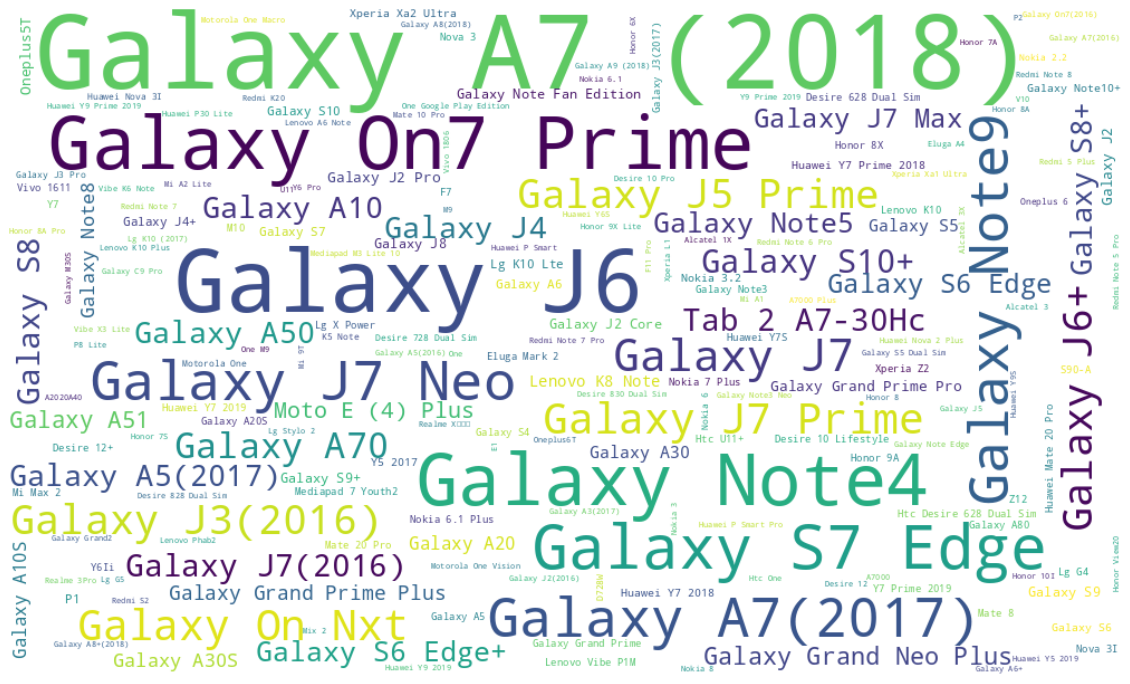

In [32]:
# Another way of plotting these values by creating a wordcloud
manufacturer_word_cloud = WordCloud(background_color="white", width=1000, height=600)
img = manufacturer_word_cloud.generate_from_frequencies(RSRP_data_invalid["DeviceName"].value_counts())

plt.figure(figsize=(20,15))
plt.imshow(img, interpolation="bilinear")
plt.axis("off")
plt.show()

This is a wordcloud of the invalid RSRP values devices.
For the most part devices are with same distribution.

# Visualization:
I'll plot this data in a better way without overplotting or undersampling. This can be achieved using the holoviews ecosystem with its libraries like datashader, holoviews.pandas, hvplot and colorcet

In [33]:
# Don't use the 'TimeStamp' as an index because there are duplicates!
RSRP_data = RSRP_data.sort_values(by="Timestamp", ignore_index=True)
# RSRP_data_valid_time_sorted = RSRP_data_valid_time_sorted.set_index("Timestamp")
RSRP_data.head(10)

Timestamp  LocationLatitude  LocationLongitude  \
0 2019-11-01 18:15:32.097000+00:00         24.639421           46.73017   
1 2019-11-01 18:15:32.505000+00:00         24.639421           46.73017   
2 2019-11-01 18:15:50.376000+00:00         24.639421           46.73017   
3 2019-11-01 18:20:11.389000+00:00         24.639421           46.73017   
4 2019-11-01 18:20:12.035000+00:00         24.639421           46.73017   
5 2019-11-01 18:20:13.264000+00:00         24.639421           46.73017   
6 2019-11-01 18:20:16.996000+00:00         24.639421           46.73017   
7 2019-11-01 18:21:45.695000+00:00         24.639421           46.73017   
8 2019-11-01 18:22:37.206000+00:00         24.639421           46.73017   
9 2019-11-01 18:36:43.521000+00:00         24.626589           46.68925   

  RadioConnectionType RadioNetworkGeneration RadioOperatorName        RSRP  \
0              Mobile                     4G        Operator B        -110   
1              Mobile                     4G        Operator B        -106   
2              Mobile                     4G        Operator B         -93   
3              Mobile                     4G        Operator B        -107   
4              Mobile                     4G        Operator B        -111   
5              Mobile                     4G        Operator B        -106   
6              Mobile                     3G        Operator B  2147483647   
7              Mobile                     3G        Operator B  2147483647   
8              Mobile                     4G        Operator B         -98   
9              Mobile                     4G        Operator C         -95   

  RadioMobileDataEnabled DeviceManufacturer               DeviceName  
0                Enabled            SAMSUNG           Galaxy S7 Edge  
1                Enabled            SAMSUNG           Galaxy S7 Edge  
2                Enabled            SAMSUNG           Galaxy S7 Edge  
3                Enabled            SAMSUNG           Galaxy S7 Edge  
4                Enabled            SAMSUNG           Galaxy S7 Edge  
5                Enabled            SAMSUNG           Galaxy S7 Edge  
6                Enabled            SAMSUNG           Galaxy S7 Edge  
7                Enabled            SAMSUNG           Galaxy S7 Edge  
8                Enabled            SAMSUNG           Galaxy S7 Edge  
9                Enabled            SAMSUNG  Galaxy Grand Prime Plus

In [34]:
df = RSRP_data.copy()

# This step is needed to prepare the data to be plotted on the map
df["LocationLongitude"], df["LocationLatitude"] = lnglat_to_meters(df["LocationLongitude"], df["LocationLatitude"])

In [35]:
# Using the map tiles provided by Esri. OpenStreetMaps can be used as well
# map_tiles = EsriImagery().opts( alpha=0.3, width=1000, height=700, bgcolor='black')

# users_points = hv.Points(RSRP_data_houred, ['LocationLongitude', 'LocationLatitude'])
# # downsampling using datashader
# shaded = hv.operation.datashader.datashade(users_points, cmap=cc.fire, width=1000, height=700)

# # plotting the points over a map provided by the tiles elements 
# map_tiles * shaded

# plot = RSRP_data_houred.hvplot.scatter("LocationLongitude",
#                                 "LocationLatitude",
#                                 rasterize=True,
#                                 cmap=cc.fire,
#                                 cnorm='eq_hist',
#                                 colorbar=False,
#                                 xaxis=None,
#                                 yaxis=None,
#                                 )
# map_tiles * plot 

# pointsA =  hv.Points(df[df["RadioOperatorName"] == "Operator A"], kdims=["LocationLongitude", "LocationLatitude"])
# rasterA = hv.operation.datashader.rasterize(pointsA).opts(cmap=cc.kr, cnorm="eq_hist", width=1000)
# highlightA = hv.operation.datashader.inspect(rasterA).opts(marker="o", size=10, fill_alpha=0, color='red', tools=["hover"])4
    
# pointsB =  hv.Points(df[df["RadioOperatorName"] == "Operator B"], kdims=["LocationLongitude", "LocationLatitude"])
# rasterB = hv.operation.datashader.rasterize(pointsB).opts(cmap=cc.kb, cnorm="eq_hist", width=1000)
# highlightB = hv.operation.datashader.inspect(rasterB).opts(marker="o", size=10, fill_alpha=0, color='green', tools=["hover"])

# pointsC =  hv.Points(df[df["RadioOperatorName"] == "Operator C"], kdims=["LocationLongitude", "LocationLatitude"])
# rasterC = hv.operation.datashader.rasterize(pointsC).opts(cmap=cc.kg, cnorm="eq_hist", width=1000)
# highlightC = hv.operation.datashader.inspect(rasterC).opts(marker="o", size=10, fill_alpha=0, color='blue', tools=["hover"])

# esri  * rasterB * highlightB * rasterC * highlightC* rasterA * highlightA

esri = hv.element.tiles.ESRI().redim(x="Longtitude", y="Latitude").opts(alpha=0.2, width=1000, height=700, bgcolor='black')
COLORS = {"Operator A": cc.kr, "Operator B": cc.kg, "Operator C": cc.kb}

def operator_map(operator_name):
    df_operator = df[df["RadioOperatorName"] == operator_name].copy()
    if (len(df_operator) == 0 ):
        return esri
    operator_points =  hv.Points(df_operator, kdims=["LocationLongitude", "LocationLatitude"])
    rastered = rasterize(operator_points).opts(cmap=COLORS[operator_name], cnorm="eq_hist",  width=1000, height=700)
    operator_highlight = inspect(rastered).opts(marker="o", size=10, fill_alpha=0, color='white', tools=["hover"])
    return esri * rastered * operator_highlight
    
operator_select = pn.widgets.RadioButtonGroup(options=list(COLORS.keys()))
interactive = pn.bind(operator_map, operator_select)
first_app = pn.Column(operator_select, interactive)
first_app

Column
    [0] RadioButtonGroup(options=['Operator A', ...], value='Operator A')
    [1] ParamFunction(function)

In this map we can see the how speard every operator users are and which areas are a hotspot, <span style="color:red">*Operator A*</span> is show in <span style="color:red">*red*</span>, <span style="color:green">*Operator B*</span> is show in <span style="color:green">*green*</span>, <span style="color:blue">*Operator C*</span> is show in <span style="color:blue">*blue*</span>.

In [36]:
points =  hv.Points(df, kdims=["LocationLongitude", "LocationLatitude"])
rastered = rasterize(points).opts(cmap=cc.fire, cnorm="eq_hist", width=1000, height=700)
highlight = inspect(rastered).opts(marker="o", size=10, fill_alpha=0, color='white', tools=["hover"])
esri * rastered * highlight 

:DynamicMap   []
   :Overlay
      .Tiles.I  :Tiles   [Longtitude,Latitude]
      .Image.I  :Image   [LocationLongitude,LocationLatitude]   (LocationLongitude_LocationLatitude Count)
      .Points.I :Points   [LocationLongitude,LocationLatitude]   (Timestamp,RadioConnectionType,RadioNetworkGeneration,RadioOperatorName,RSRP,RadioMobileDataEnabled,DeviceManufacturer,DeviceName)

This is a plot of the whole dataset we have for all the operators over the whole period we have.

After cleaning the data is better to save it in a new file, so we don't have to go through all of this processing again if we needed to do more processing.
I'll use a better format than CSV called Parquet, it's built-in pandas only requires the installation of fastparquet library.

In [38]:
print(RSRP_data.shape)

(2725353, 10)


In [39]:
RSRP_data.drop_duplicates(inplace=True)

In [40]:
print(RSRP_data.shape)

(2723541, 10)


RSRP_data dataframe is now more ready for ML algorithms. I'll save the processed data for later use. The parquet format is used because it keeps the data types, faster during read/write operations and much smaller the csv files

In [43]:
RSRP_data.to_parquet("./Data/RSRP_data_processed.parq")